In [44]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, invgamma, gamma
from scipy.linalg import sqrtm
from scipy.optimize import minimize
import pandas as pd
from tqdm import tqdm

# Оценки для опционов колл на отношение цен

Пример (Haug, 2007, с. 203). Вычислите оценки для опционов колл на отношение для
$\sigma_1=0.3$, $\sigma_2=0.4$, $b_1=0.05$,
$b_2=0.03$, $r=0.07$, $S_1=130$, $S_2=100$, $T=0.25, 0.5$, $\rho=\{-0.5, 0, 0.5\}$ и $K=0.1, 0.2, \ldots, 1.0, 2.0, 3.0$, безрисковая ставка 7\%.

In [45]:
sigma1 = 0.3
sigma2 = 0.4
b1 = 0.05
b2 = 0.03
r = 0.07
S1 = 130
S2 = 100
T_range = [0.25, 0.5]
rho_range = [-0.5, 0, 0.5]
K_range = list(np.arange(0.1, 3.1, 0.1))

In [46]:
# оценка стоимости опциона колл на отношение цен двух активов
def quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call):
    theta = 1
    if is_call == False:
        theta = -1
    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 - 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 / S2 / K) + (b1 - b2 - 0.5 * (sigma1 ** 2 - sigma2 ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)
    F = S1 / S2 * np.exp((b1 - b2 +  sigma2 * (sigma2 - rho * sigma1)) * T)
    option = theta * np.exp(-r * T) * (F * norm.cdf(theta * d2) - K * norm.cdf(theta * d1))

    return option

In [47]:
outperformance_df = pd.DataFrame([
    {
        'K': K,
        'rho': rho,
        'T': T,
        'price':quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call = True)
    }
    for K in K_range
    for rho in rho_range
    for T in T_range
])

In [48]:
pd.pivot_table(outperformance_df, values='price', index=['K'], columns=['T', 'rho'])

T        0.25                              0.50                    
rho      -0.5       0.0           0.5      -0.5       0.0       0.5
K                                                                  
0.1  1.258176  1.237981  1.218087e+00  1.318772  1.276942  1.236349
0.2  1.159910  1.139716  1.119822e+00  1.222211  1.180382  1.139789
0.3  1.061645  1.041450  1.021556e+00  1.125658  1.083821  1.043228
0.4  0.963381  0.943185  9.232911e-01  1.029201  0.987271  0.946668
0.5  0.865142  0.844921  8.250259e-01  0.933227  0.890826  0.850109
0.6  0.767100  0.746686  7.267608e-01  0.838607  0.794886  0.753578
0.7  0.669880  0.648681  6.285021e-01  0.746640  0.700395  0.657273
0.8  0.574835  0.551674  5.303439e-01  0.658795  0.608852  0.561914
0.9  0.484000  0.457423  4.328959e-01  0.576419  0.522055  0.469130
1.0  0.399660  0.368638  3.382126e-01  0.500532  0.441702  0.381422
1.1  0.323794  0.288321  2.503546e-01  0.431749  0.369086  0.301586
1.2  0.257675  0.218872  1.743351e-01  0.370288  0.304936  0.231923
1.3  0.201735  0.161489  1.138825e-01  0.316041  0.249416  0.173677
1.4  0.155654  0.116063  6.986651e-02  0.268656  0.202224  0.126904
1.5  0.118577  0.081469  4.041277e-02  0.227624  0.162732  0.090696
1.6  0.089341  0.056007  2.215991e-02  0.192349  0.130120  0.063560
1.7  0.066683  0.037811  1.158871e-02  0.162202  0.103489  0.043788
1.8  0.049379  0.025132  5.814785e-03  0.136562  0.081946  0.029725
1.9  0.036324  0.016485  2.815324e-03  0.114840  0.064655  0.019926
2.0  0.026575  0.010692  1.322108e-03  0.096496  0.050866  0.013215
2.1  0.019356  0.006871  6.050017e-04  0.081041  0.039927  0.008687
2.2  0.014049  0.004381  2.708747e-04  0.068047  0.031287  0.005668
2.3  0.010168  0.002776  1.190836e-04  0.057135  0.024487  0.003676
2.4  0.007344  0.001750  5.156523e-05  0.047983  0.019148  0.002372
2.5  0.005296  0.001099  2.205238e-05  0.040310  0.014966  0.001525
2.6  0.003816  0.000688  9.336073e-06  0.033882  0.011695  0.000977
2.7  0.002747  0.000430  3.920709e-06  0.028496  0.009140  0.000625
2.8  0.001978  0.000268  1.636139e-06  0.023983  0.007145  0.000399
2.9  0.001424  0.000167  6.795067e-07  0.020201  0.005588  0.000254
3.0  0.001025  0.000104  2.812284e-07  0.017030  0.004374  0.000162

Пример. Повторите вычисления для опционов пут.

In [49]:
# оценка стоимости опциона колл на отношение цен двух активов
def quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call):
    theta = 1
    if is_call == False:
        theta = -1
    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 - 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 / S2 / K) + (b1 - b2 - 0.5 * (sigma1 ** 2 - sigma2 ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)
    F = S1 / S2 * np.exp((b1 - b2 +  sigma2 * (sigma2 - rho * sigma1)) * T)
    option = theta * np.exp(-r * T) * (F * norm.cdf(theta * d2) - K * norm.cdf(theta * d1))

    return option

In [50]:
outperformance_df = pd.DataFrame([
    {
        'K': K,
        'rho': rho,
        'T': T,
        'price':quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call = False)
    }
    for K in K_range
    for rho in rho_range
    for T in T_range
])

pd.pivot_table(outperformance_df, values='price', index=['K'], columns=['T', 'rho'])

T            0.25                                      0.50                \
rho          -0.5           0.0           0.5          -0.5           0.0   
K                                                                           
0.1  3.778084e-20  6.901476e-28  1.250578e-49  5.123091e-12  4.854537e-16   
0.2  2.487462e-12  1.411677e-16  2.177139e-28  7.989515e-08  4.387780e-10   
0.3  9.205951e-09  1.827384e-11  6.814500e-19  7.344569e-06  2.454494e-07   
0.4  1.134986e-06  1.683099e-08  1.869670e-13  1.112457e-04  1.041540e-05   
0.5  2.695529e-05  1.424162e-06  5.708291e-10  6.978822e-04  1.261876e-04   
0.6  2.507371e-04  3.109487e-05  1.365790e-07  2.637833e-03  7.469382e-04   
0.7  1.295519e-03  2.910915e-04  6.678895e-06  7.231218e-03  2.815519e-03   
0.8  4.515951e-03  1.549517e-03  1.137204e-04  1.594718e-02  7.833919e-03   
0.9  1.194655e-02  5.564030e-03  9.309483e-04  3.013163e-02  1.759664e-02   
1.0  2.587163e-02  1.504463e-02  4.512810e-03  5.080542e-02  3.380455e-02   
1.1  4.827076e-02  3.299232e-02  1.492005e-02  7.858253e-02  5.774939e-02   
1.2  8.041701e-02  6.180836e-02  3.716581e-02  1.136823e-01  9.015964e-02   
1.3  1.227419e-01  1.026904e-01  7.497846e-02  1.559958e-01  1.311999e-01   
1.4  1.749267e-01  1.555300e-01  1.292277e-01  2.051716e-01  1.805689e-01   
1.5  2.361140e-01  2.192013e-01  1.980391e-01  2.607001e-01  2.376376e-01   
1.6  3.051435e-01  2.920045e-01  2.780515e-01  3.219852e-01  3.015858e-01   
1.7  3.807513e-01  3.720740e-01  3.657455e-01  3.883986e-01  3.715156e-01   
1.8  4.617120e-01  4.576603e-01  4.582368e-01  4.593193e-01  4.465333e-01   
1.9  5.469222e-01  5.472780e-01  5.535026e-01  5.341583e-01  5.258026e-01   
2.0  6.354385e-01  6.397508e-01  6.502746e-01  6.123745e-01  6.085738e-01   
2.1  7.264853e-01  7.341944e-01  7.478227e-01  6.934807e-01  6.941958e-01   
2.2  8.194428e-01  8.299700e-01  8.457538e-01  7.770463e-01  7.821164e-01   
2.3  9.138275e-01  9.266300e-01  9.438672e-01  8.626954e-01  8.718762e-01   
2.4  1.009269e+00  1.023869e+00  1.042065e+00  9.501033e-01  9.630981e-01   
2.5  1.105486e+00  1.121483e+00  1.140301e+00  1.038992e+00  1.055477e+00   
2.6  1.202271e+00  1.219338e+00  1.238553e+00  1.129124e+00  1.148766e+00   
2.7  1.299467e+00  1.317344e+00  1.336813e+00  1.220298e+00  1.242772e+00   
2.8  1.396963e+00  1.415448e+00  1.435076e+00  1.312346e+00  1.337337e+00   
2.9  1.494674e+00  1.513612e+00  1.533340e+00  1.405125e+00  1.432341e+00   
3.0  1.592541e+00  1.611815e+00  1.631605e+00  1.498514e+00  1.527687e+00   

T                  
rho           0.5  
K                  
0.1  3.181683e-27  
0.2  2.895217e-16  
0.3  2.671441e-11  
0.4  2.054317e-08  
0.5  1.562804e-06  
0.6  3.195037e-05  
0.7  2.870075e-04  
0.8  1.489080e-03  
0.9  5.265529e-03  
1.0  1.411781e-02  
1.1  3.084259e-02  
1.2  5.774018e-02  
1.3  9.605428e-02  
1.4  1.458417e-01  
1.5  2.061943e-01  
1.6  2.756193e-01  
1.7  3.524075e-01  
1.8  4.349048e-01  
1.9  5.216662e-01  
2.0  6.115164e-01  
2.1  7.035486e-01  
2.2  7.970902e-01  
2.3  8.916586e-01  
2.4  9.869155e-01  
2.5  1.082629e+00  
2.6  1.178642e+00  
2.7  1.274850e+00  
2.8  1.371184e+00  
2.9  1.467600e+00  
3.0  1.564069e+00

### Задача

In [51]:
# Параметры задачи
sigma1 = 0.3
sigma2 = 0.4
b1 = 0.05
b2 = 0.03
r = 0.07
S1 = 130
S2 = 100
T_range = [0.25, 0.5]
rho_range = [-0.5, 0, 0.5]
K_range = list(np.arange(0.1, 3.1, 0.1))

In [52]:

# Формула для цены опциона
def quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call):
    theta = 1 if is_call else -1
    sigma_hat = np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
    d1 = (np.log(S1 / S2 / K) + (b1 - b2 - 0.5 * (sigma1**2 - sigma2**2)) * T) / (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)
    F = S1 / S2 * np.exp((b1 - b2 + sigma2 * (sigma2 - rho * sigma1)) * T)
    option = theta * np.exp(-r * T) * (F * norm.cdf(theta * d2) - K * norm.cdf(theta * d1))
    return option

# Вычисление цен опционов и проверка паритета
results = []
for K in K_range:
    for rho in rho_range:
        for T in T_range:
            call_price = quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call=True)
            put_price = quotient_option_price_Zhang(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call=False)
            parity_difference = call_price - put_price - (S1 / S2 * np.exp((b1 - b2) * T) - K * np.exp(-r * T))
            results.append({
                "K": K,
                "rho": rho,
                "T": T,
                "Call Price": call_price,
                "Put Price": put_price,
                "Parity Difference": parity_difference
            })

results_df = pd.DataFrame(results)

# Результаты в виде сводной таблицы
pivot_table = pd.pivot_table(
    results_df,
    values="Parity Difference",
    index=["K"],
    columns=["T", "rho"]
)

# Вывод результатов
print("Сводная таблица отклонений от паритета:")
print(pivot_table)

Сводная таблица отклонений от паритета:
T        0.25                         0.50                    
rho      -0.5      0.0       0.5      -0.5       0.0       0.5
K                                                             
0.1  0.049925  0.02973  0.009836  0.102267  0.060438  0.019844
0.2  0.049925  0.02973  0.009836  0.102267  0.060438  0.019844
0.3  0.049925  0.02973  0.009836  0.102267  0.060438  0.019844
0.4  0.049925  0.02973  0.009836  0.102267  0.060438  0.019844
0.5  0.049925  0.02973  0.009836  0.102267  0.060438  0.019844
0.6  0.049925  0.02973  0.009836  0.102267  0.060438  0.019844
0.7  0.049925  0.02973  0.009836  0.102267  0.060438  0.019844
0.8  0.049925  0.02973  0.009836  0.102267  0.060438  0.019844
0.9  0.049925  0.02973  0.009836  0.102267  0.060438  0.019844
1.0  0.049925  0.02973  0.009836  0.102267  0.060438  0.019844
1.1  0.049925  0.02973  0.009836  0.102267  0.060438  0.019844
1.2  0.049925  0.02973  0.009836  0.102267  0.060438  0.019844
1.3  0.049925  

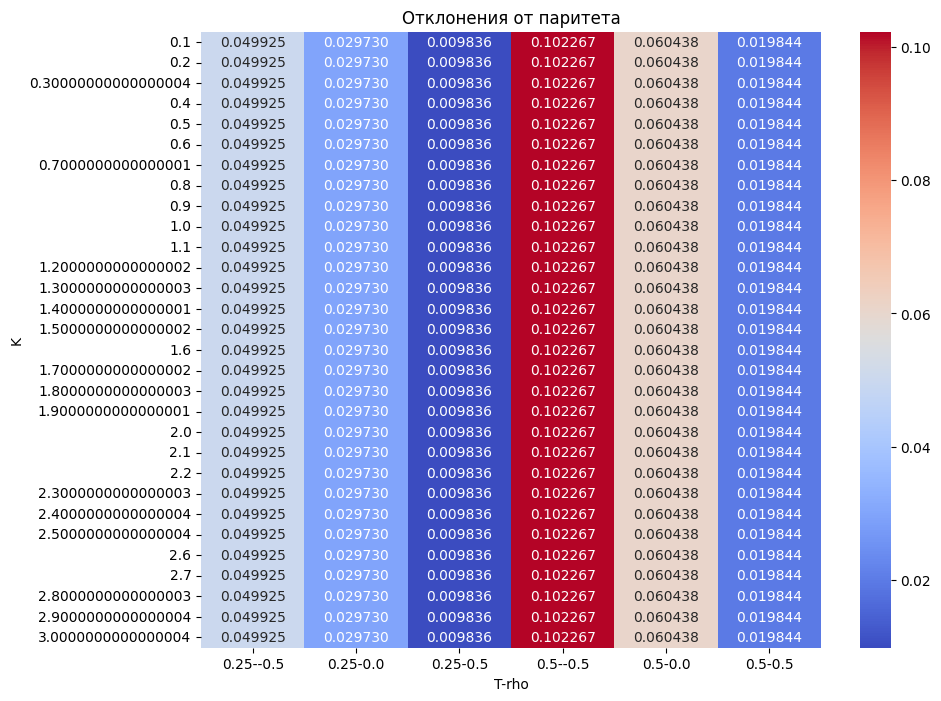

In [53]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".6f", cmap="coolwarm", cbar=True)
plt.title("Отклонения от паритета")
plt.show()

# Выводы
Разница по паритету должна быть близка к нулю, потому что это теоретическое свойство опционов, основанное на принципе отсутствия арбитража.
Из таблицы видно, что это свойство выполняется.

# Оценки для опционов на произведение цен

Пример (Haug, 2007, с. 205). Вычислите оценки для опционов колл на произведение цен для $K=15000$, $S_1=100$, $S_2=105$, $b_1=0.02$, $b_2=0.05$, $T=0.5, 1$, $\sigma_1=\{0.2, 0.3, 0.4\}$, $\sigma_2=0.3$, безрисковая ставка $r=0.07$.

In [54]:
K = 15000
b1 = 0.02
b2 = 0.05
r = 0.07
S1 = 100
S2 = 105
T_range = [0.1, 0.5]
rho_range = [-0.5, 0, 0.5]
sigma1_range = [0.2, 0.3, 0.4]
sigma2 = 0.3

In [55]:
#  оценка стоимости опциона колл на произведение цен двух активов
def product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call):
    theta = 1
    if is_call == False:
        theta = -1
    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 + 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 * S2 / K) + (b1 + b2 - 0.5 * (sigma1 ** 2 + sigma2 ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)

    F = S1 * S2 * np.exp((b1 + b2 + rho * sigma1 * sigma2) * T)
    option = theta * np.exp(-r * T) * (F * norm.cdf(theta * d2) - K * norm.cdf(theta * d1))

    return option

In [56]:
prices_df = pd.DataFrame([
    {
        'sigma1': sigma1,
        'sigma2': sigma2,
        'rho': rho,
        'T': T,
        'price': product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call = True)
    }
    for sigma1 in sigma1_range
    for rho in rho_range
    for T in T_range
])

pd.pivot_table(prices_df, values='price', index=['sigma1', 'sigma2'], columns=['T', 'rho'])

T                   0.1                              0.5              \
rho                -0.5       0.0        0.5        -0.5         0.0   
sigma1 sigma2                                                          
0.2    0.3     0.002812  0.428850   3.295569   32.613246  154.337957   
0.3    0.3     0.026672  2.402646  13.261771   56.773262  266.159407   
0.4    0.3     0.353503  9.327321  35.490780  118.150427  425.940177   

T                          
rho                   0.5  
sigma1 sigma2              
0.2    0.3     319.714092  
0.3    0.3     531.789411  
0.4    0.3     787.974208

Пример. Повторите вычисления для опционов пут.

In [57]:
#  оценка стоимости опциона пут на произведение цен двух активов
def product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call):
    theta = 1
    if is_call == False:
        theta = -1
    sigma_hat = np.sqrt(sigma1 ** 2 + sigma2 ** 2 + 2 * rho * sigma1 * sigma2)

    d1 = (np.log(S1 * S2 / K) + (b1 + b2 - 0.5 * (sigma1 ** 2 + sigma2 ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)

    F = S1 * S2 * np.exp((b1 + b2 + rho * sigma1 * sigma2) * T)
    option = theta * np.exp(-r * T) * (F * norm.cdf(theta * d2) - K * norm.cdf(theta * d1))

    return option

In [58]:
prices_df = pd.DataFrame([
    {
        'sigma1': sigma1,
        'sigma2': sigma2,
        'rho': rho,
        'T': T,
        'price': product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call = False)
    }
    for sigma1 in sigma1_range
    for rho in rho_range
    for T in T_range
])

pd.pivot_table(prices_df, values='price', index=['sigma1', 'sigma2'], columns=['T', 'rho'])

T                      0.1                                    0.5  \
rho                   -0.5          0.0          0.5         -0.5   
sigma1 sigma2                                                       
0.2    0.3     4426.822253  4395.795494  4367.114916  4173.019124   
0.3    0.3     4442.537163  4397.769290  4361.271943  4274.466515   
0.4    0.3     4458.531524  4404.693965  4367.668045  4412.553568   

T                                        
rho                    0.0          0.5  
sigma1 sigma2                            
0.2    0.3     4138.419201  4145.108158  
0.3    0.3     4250.240651  4276.942796  
0.4    0.3     4410.021421  4452.282846

### Задача

In [59]:
# Вычисление цен опционов и проверка паритета
results = []
for sigma1 in sigma1_range:
    for rho in rho_range:
        for T in T_range:
            # Расчет цен колл и пут опционов
            call_price = product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call=True)
            put_price = product_option_price(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, is_call=False)
            # Вычисление форвардной цены
            F = S1 * S2 * np.exp((b1 + b2) * T)
            # Проверка паритета
            parity_difference = call_price - put_price - (F - K * np.exp(-r * T))
            results.append({
                "sigma1": sigma1,
                "rho": rho,
                "T": T,
                "Call Price": call_price,
                "Put Price": put_price,
                "Parity Difference": parity_difference
            })

results_df = pd.DataFrame(results)

# Сводная таблица отклонений от паритета
pivot_table = pd.pivot_table(
    results_df,
    values="Parity Difference",
    index=["sigma1"],
    columns=["T", "rho"]
)

# Вывод отклонений в удобном виде
from tabulate import tabulate
print("Сводная таблица отклонений от паритета:")
print(tabulate(pivot_table, headers="keys", tablefmt="pretty", floatfmt=".6f"))

Сводная таблица отклонений от паритета:
+--------+---------------------+--------------------+---------------------+--------------------+---------------------+---------------------+
| sigma1 |     (0.1, -0.5)     |     (0.1, 0.0)     |     (0.1, 0.5)      |    (0.5, -0.5)     |     (0.5, 0.0)      |     (0.5, 0.5)      |
+--------+---------------------+--------------------+---------------------+--------------------+---------------------+---------------------+
|  0.2   | -105.21064851649408 | -73.7578513019098  | -42.21055401645299  | -530.331576563889  | -374.0069423960458  | -215.31976393099376 |
|  0.3   | -120.90169809141935 | -73.75785130190889 |  -26.4013791535981  | -607.6189518660121 |  -374.006942396044  | -135.0790836693618  |
|  0.4   | -136.5692287355905  | -73.7578513019107  | -10.568472734231364 | -684.3288401367108 | -374.00694239604445 | -54.23433588411717  |
+--------+---------------------+--------------------+---------------------+--------------------+------------------

## Задача

Задача (Zhang, 1998, p. 428-437).
Предположим, что есть две акции со спотовыми ценами $S_1 = S_2 = 100$, волатильностью $\sigma_1 = 18\%$ и $\sigma_2 = 15\%$ и ставками дивидендов $q_1 = 4\%$, $q_2 = 3\%$, коэффициент корреляции доходностей  $\rho=0.75$, безрисковая ставка $r = 5\%$ и цена исполнения опциона $K = 1$.

Оцените цены опционов колл и пут по отношению цены первого актива к цене второго, cрок действия которого истекает через год.

Сравните полученные ответ с книгой и сделайте выводы: call=0.0453, put=0.0557.

In [60]:
# У Чжана другие условия задачи - он подставляет 0.3 и 0.4 в качестве b(=r-q), а не q;
# У Чжана в формуле для d1 вместо (sigma1** - sigma2**2) подставляет sigma_hat**2;
# У Чжана счетная ошибка: пересчитать d1 с его числами - получится другой результат.


def quotient_price_Zhang(tip, S, K, rho, sigma, r, q, T):
    sigma_hat = np.sqrt(sigma[0] ** 2 + sigma[1] ** 2 - 2 * rho * sigma[1] * sigma[0])
    b=[]
    b.append(r-q[0])
    b.append(r-q[1])
    print(b)
    d1 = (np.log(S[0] / S[1] / K) + (b[0] - b[1] - 0.5 * (sigma[0] ** 2 - sigma[1] ** 2)) * T) / \
         (sigma_hat * np.sqrt(T))

    #d1 = (np.log(S[0] / S[1] / K) + (b[0] - b[1] - 0.5 * (sigma_hat**2)) * T) / \
     #    (sigma_hat * np.sqrt(T))
    d2 = d1 + sigma_hat * np.sqrt(T)
    F = S[0] / S[1] * np.exp((b[0] - b[1] +  sigma[1] * (sigma[1] - rho * sigma[0])) * T)

    print(sigma_hat, d1, d2)

    if (tip == 'call'):
        return np.exp(-r * T) * (F * norm.cdf(d2) - K * norm.cdf(d1))
    elif (tip == 'put'):
        return -np.exp(-r * T) * (F * norm.cdf(-d2) - K * norm.cdf(-d1))
    else:
        print('Wrong option type')
        return 0

In [61]:
S=[100.,100.]
K=1
sigma=[0.18,0.15]
q=[0.02,0.01]
rho=0.75
r=0.05
T=1.

print('call=',quotient_price_Zhang('call', S, K, rho, sigma, r, q, T),'; put=',quotient_price_Zhang('put', S, K, rho, sigma, r, q, T))

[0.030000000000000002, 0.04]
0.12000000000000001 -0.12458333333333331 -0.0045833333333333
[0.030000000000000002, 0.04]
0.12000000000000001 -0.12458333333333331 -0.0045833333333333
call= 0.04175792725948984 ; put= 0.049101462345027665


# Мини-проект

Опираясь на книгу ([Hang, 2007](https://drive.google.com/file/d/1yxjRkchVqvl2xkQFyeB2BKNQ1SKJSTtK/view?usp=drive_link)) реализовать расчеты по приведенным формулам и примерам. Привести необходимые определения, оформить формулы с использованием MarkDown. Построить необходимые таблицы и подкрепить полученные результаты иллюстративными графиками. Сделать выводы.

1.   Two-asset correlation options (c. 205).
1.   Exchange-one-asset-for-another options (c. 206).
1.   American exchange-one-asset-for-another options (c. 208).
1.   Exchange options on exchange options (c. 209).
1.   Options on the maximum or the minimun of two risky assets. Call (c. 211).
1.   Options on the maximum or the minimun of two risky assets. Put (c. 211).
1.   Spread-otions approximation (c. 213).
1.   Two-asset barrrier options. Two-asset "out" barriers (c. 215).
1.   Two-asset barrrier options. Two-asset "in" barriers (c. 215).
1.   Partical time two-asset barrrier options. Down-and-in (c. 217).
1.   Partical time two-asset barrrier options. Up-and-in (c. 217).
1.   Two-asset cash-or-nothing options (c. 221)


# Task 1

Результаты для опциона колл на произведение цен двух активов:
   rho    T   Call Price
0 -0.5  0.5    55.040757
1 -0.5  1.0   229.945753
2  0.0  0.5   266.159407
3  0.0  1.0   755.747900
4  0.5  0.5   529.451116
5  0.5  1.0  1314.011732


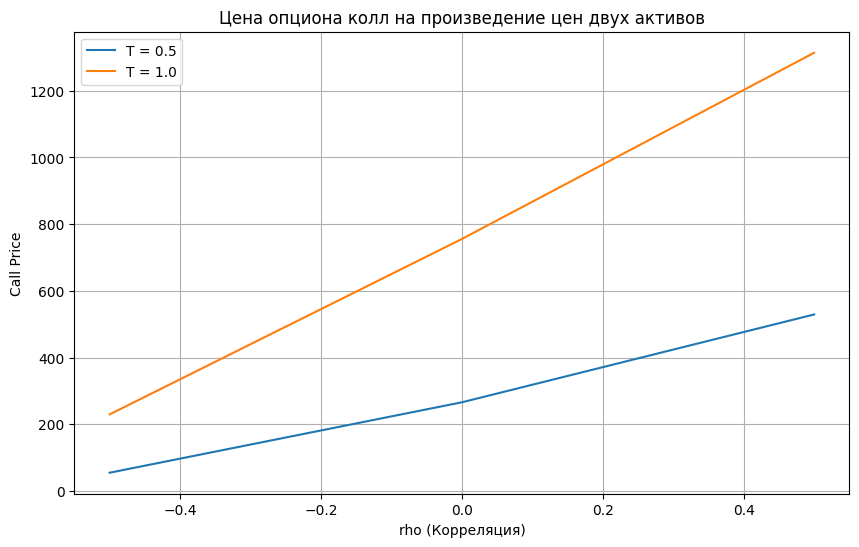

In [62]:
# Формула цены опциона на произведение двух активов
def two_asset_correlation_option(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, r, is_call=True):
    theta = 1 if is_call else -1
    sigma = np.sqrt(sigma1**2 + sigma2**2 + 2 * rho * sigma1 * sigma2)
    d1 = (np.log(S1 * S2 / K) + (b1 + b2 + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    F = S1 * S2 * np.exp((b1 + b2 + rho * sigma1 * sigma2) * T)
    return np.exp(-r * T) * (F * norm.cdf(theta * d1) - K * norm.cdf(theta * d2))

# Параметры задачи
S1, S2 = 100, 105
b1, b2 = 0.02, 0.05
sigma1, sigma2 = 0.3, 0.3
K = 15000
rho_range = [-0.5, 0, 0.5]
T_range = [0.5, 1.0]
r = 0.07

# Вычисление цен для различных параметров
results = []
for rho in rho_range:
    for T in T_range:
        price = two_asset_correlation_option(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, r, is_call=True)
        results.append({"rho": rho, "T": T, "Call Price": price})

# Преобразование в DataFrame
df = pd.DataFrame(results)

# Построение таблицы
print("Результаты для опциона колл на произведение цен двух активов:")
print(df)

# Визуализация
plt.figure(figsize=(10, 6))
for T in T_range:
    subset = df[df["T"] == T]
    plt.plot(subset["rho"], subset["Call Price"], label=f"T = {T}")
plt.xlabel("rho (Корреляция)")
plt.ylabel("Call Price")
plt.title("Цена опциона колл на произведение цен двух активов")
plt.legend()
plt.grid()
plt.show()


# Task 2

Результаты для опциона обмена одного актива на другой:
   rho    T  Call Price
0 -0.5  0.5   12.126377
1 -0.5  1.0   17.312498
2  0.0  0.5    9.527423
3  0.0  1.0   13.789886
4  0.5  0.5    6.145622
5  0.5  1.0    9.158541


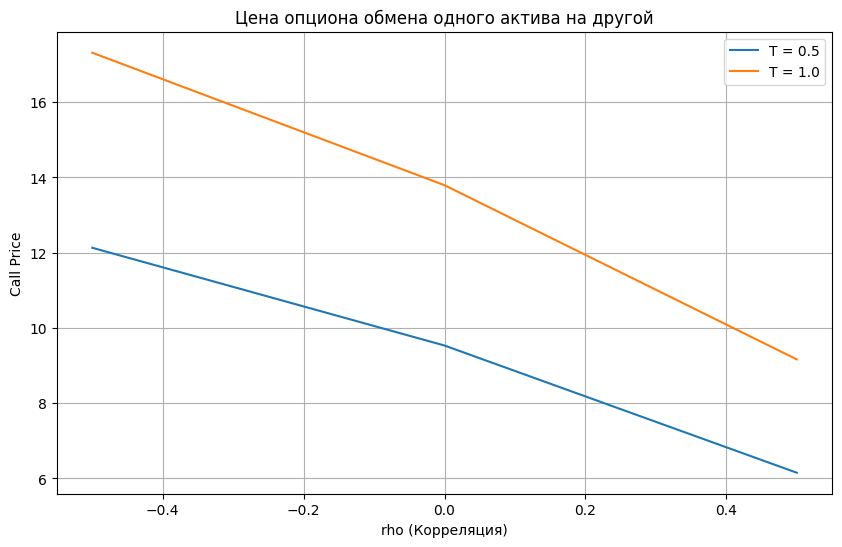

In [63]:
# Формула для опциона обмена одного актива на другой
def exchange_option(S1, S2, b1, b2, sigma1, sigma2, rho, T, r):
    sigma = np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
    d1 = (np.log(S1 / S2) + (b1 - b2 + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = np.exp(-r * T) * (S1 * norm.cdf(d1) - S2 * norm.cdf(d2))
    return call_price

# Параметры задачи
S1, S2 = 100, 105
b1, b2 = 0.02, 0.05
sigma1, sigma2 = 0.3, 0.3
rho_range = [-0.5, 0, 0.5]
T_range = [0.5, 1.0]
r = 0.07

# Вычисление цен для различных параметров
exchange_results = []
for rho in rho_range:
    for T in T_range:
        price = exchange_option(S1, S2, b1, b2, sigma1, sigma2, rho, T, r)
        exchange_results.append({"rho": rho, "T": T, "Call Price": price})

# Преобразование в DataFrame
exchange_df = pd.DataFrame(exchange_results)

# Построение таблицы
print("Результаты для опциона обмена одного актива на другой:")
print(exchange_df)

# Визуализация
plt.figure(figsize=(10, 6))
for T in T_range:
    subset = exchange_df[exchange_df["T"] == T]
    plt.plot(subset["rho"], subset["Call Price"], label=f"T = {T}")
plt.xlabel("rho (Корреляция)")
plt.ylabel("Call Price")
plt.title("Цена опциона обмена одного актива на другой")
plt.legend()
plt.grid()
plt.show()

# Task 3

Результаты для американского опциона обмена одного актива на другой:
   rho    T  American Call Price
0 -0.5  0.5            12.126377
1 -0.5  1.0            17.312498
2  0.0  0.5             9.527423
3  0.0  1.0            13.789886
4  0.5  0.5             6.145622
5  0.5  1.0             9.158541


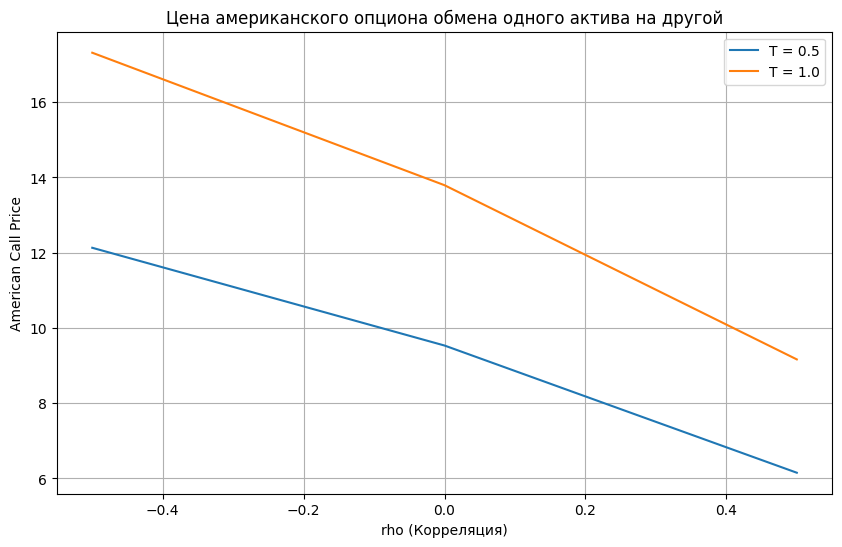

In [64]:
# Американский опцион обмена одного актива на другой
def american_exchange_option(S1, S2, b1, b2, sigma1, sigma2, rho, T, r):
    # Европейская цена
    european_price = exchange_option(S1, S2, b1, b2, sigma1, sigma2, rho, T, r)
    # Американская цена с учетом немедленного исполнения
    immediate_exercise_value = max(S1 - S2, 0)
    return max(immediate_exercise_value, european_price)

# Параметры задачи
rho_range = [-0.5, 0, 0.5]
T_range = [0.5, 1.0]

# Вычисление цен для различных параметров
american_results = []
for rho in rho_range:
    for T in T_range:
        price = american_exchange_option(S1, S2, b1, b2, sigma1, sigma2, rho, T, r)
        american_results.append({"rho": rho, "T": T, "American Call Price": price})

# Преобразование в DataFrame
american_df = pd.DataFrame(american_results)

# Построение таблицы
print("Результаты для американского опциона обмена одного актива на другой:")
print(american_df)

# Визуализация
plt.figure(figsize=(10, 6))
for T in T_range:
    subset = american_df[american_df["T"] == T]
    plt.plot(subset["rho"], subset["American Call Price"], label=f"T = {T}")
plt.xlabel("rho (Корреляция)")
plt.ylabel("American Call Price")
plt.title("Цена американского опциона обмена одного актива на другой")
plt.legend()
plt.grid()
plt.show()

# Task 4

Результаты для опциона на обменный опцион:
   rho    T  Option on Exchange Price
0 -0.5  0.5                  2.790169
1 -0.5  1.0                  7.284474
2  0.0  0.5                  0.910469
3  0.0  1.0                  4.127411
4  0.5  0.5                  0.005939
5  0.5  1.0                  0.717695


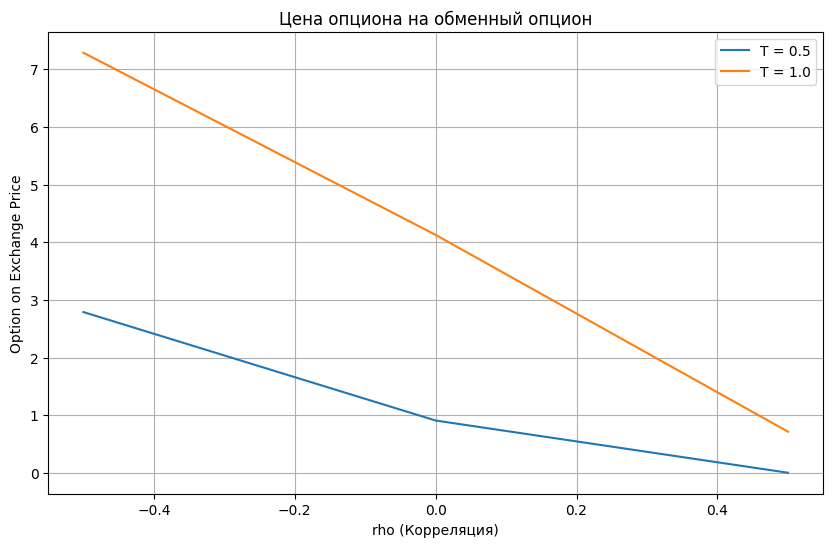

In [65]:
# Цена опциона на обменный опцион
def exchange_on_exchange_option(S1, S2, b1, b2, sigma1, sigma2, rho, T, r, K_o):
    # Цена базового обменного опциона
    european_price = exchange_option(S1, S2, b1, b2, sigma1, sigma2, rho, T, r)
    
    # Приближенная волатильность опциона
    sigma_C = np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
    
    # Формулы d1 и d2 для опциона на опцион
    d1 = (np.log(european_price / K_o) + 0.5 * sigma_C**2 * T) / (sigma_C * np.sqrt(T))
    d2 = d1 - sigma_C * np.sqrt(T)
    
    # Цена опциона на обменный опцион
    price = np.exp(-r * T) * (european_price * norm.cdf(d1) - K_o * norm.cdf(d2))
    return price

# Параметры задачи
S1, S2 = 100, 105
b1, b2 = 0.02, 0.05
sigma1, sigma2 = 0.3, 0.3
rho_range = [-0.5, 0, 0.5]
T_range = [0.5, 1.0]
r = 0.07
K_o = 10  # Премия опциона на опцион

# Вычисление цен
exchange_on_exchange_results = []
for rho in rho_range:
    for T in T_range:
        price = exchange_on_exchange_option(S1, S2, b1, b2, sigma1, sigma2, rho, T, r, K_o)
        exchange_on_exchange_results.append({"rho": rho, "T": T, "Option on Exchange Price": price})

# Преобразование в DataFrame
exchange_on_exchange_df = pd.DataFrame(exchange_on_exchange_results)

# Построение таблицы
print("Результаты для опциона на обменный опцион:")
print(exchange_on_exchange_df)

# Визуализация
plt.figure(figsize=(10, 6))
for T in T_range:
    subset = exchange_on_exchange_df[exchange_on_exchange_df["T"] == T]
    plt.plot(subset["rho"], subset["Option on Exchange Price"], label=f"T = {T}")
plt.xlabel("rho (Корреляция)")
plt.ylabel("Option on Exchange Price")
plt.title("Цена опциона на обменный опцион")
plt.legend()
plt.grid()
plt.show()

# Task 5

Результаты для опциона на максимум двух активов (Call):
      K  rho    T       Price
0    90 -0.5  0.5  107.166349
1    90 -0.5  1.0   96.728532
2    90  0.0  0.5  108.554420
3    90  0.0  1.0   98.055794
4    90  0.5  0.5  111.522568
5    90  0.5  1.0  100.894830
6   100 -0.5  0.5   70.646711
7   100 -0.5  1.0   69.718864
8   100  0.0  0.5   72.189012
9   100  0.0  1.0   71.193600
10  100  0.5  0.5   75.486954
11  100  0.5  1.0   74.348084
12  110 -0.5  0.5   35.850637
13  110 -0.5  1.0   44.277348
14  110  0.0  0.5   37.547168
15  110  0.0  1.0   45.899558
16  110  0.5  0.5   41.174904
17  110  0.5  1.0   49.369490


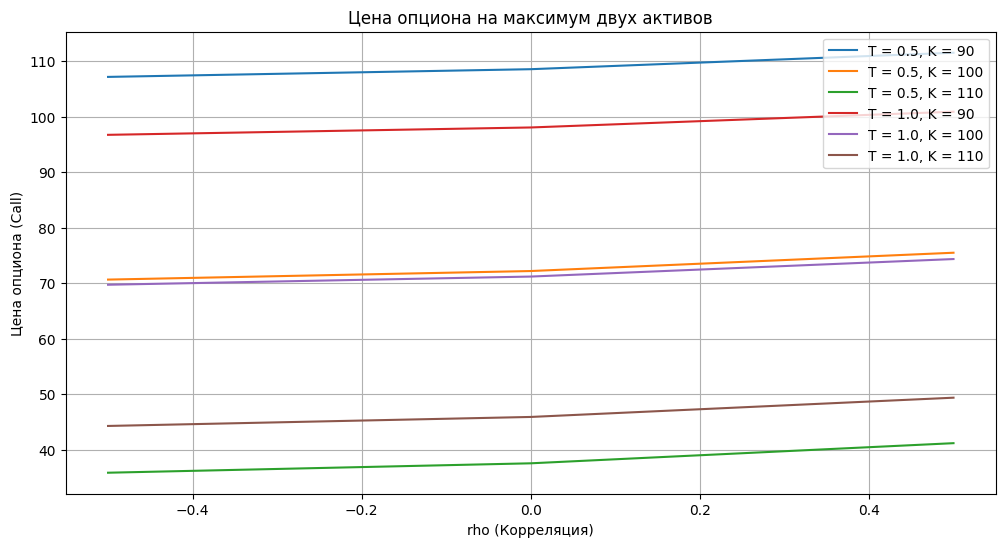

In [66]:
# Цена опциона на максимум двух активов (Call)
def option_on_max(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, r):
    # Расчет d1, d2, d3
    d1 = (np.log(S1 / K) + (b1 - r + 0.5 * sigma1**2) * T) / (sigma1 * np.sqrt(T))
    d2 = (np.log(S2 / K) + (b2 - r + 0.5 * sigma2**2) * T) / (sigma2 * np.sqrt(T))
    d3 = (np.log(S1 / S2) + (b1 - b2 + 0.5 * (sigma1**2 - sigma2**2)) * T) / \
         (np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2) * np.sqrt(T))
    
    # Расчет цены
    price = (S1 * np.exp((b1 - r) * T) * norm.cdf(d1) +
             S2 * np.exp((b2 - r) * T) * norm.cdf(d2) -
             K * np.exp(-r * T) * norm.cdf(d3))
    return price

# Параметры задачи
S1, S2 = 100, 105
b1, b2 = 0.02, 0.05
sigma1, sigma2 = 0.3, 0.4
K_range = [90, 100, 110]
rho_range = [-0.5, 0, 0.5]
T_range = [0.5, 1.0]
r = 0.07

# Вычисление цен
max_option_results = []
for K in K_range:
    for rho in rho_range:
        for T in T_range:
            price = option_on_max(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, r)
            max_option_results.append({"K": K, "rho": rho, "T": T, "Price": price})

# Преобразование в DataFrame
max_option_df = pd.DataFrame(max_option_results)

# Построение таблицы
print("Результаты для опциона на максимум двух активов (Call):")
print(max_option_df)

# Визуализация
plt.figure(figsize=(12, 6))
for T in T_range:
    subset = max_option_df[max_option_df["T"] == T]
    for K in K_range:
        subset_K = subset[subset["K"] == K]
        plt.plot(subset_K["rho"], subset_K["Price"], label=f"T = {T}, K = {K}")
plt.xlabel("rho (Корреляция)")
plt.ylabel("Цена опциона (Call)")
plt.title("Цена опциона на максимум двух активов")
plt.legend()
plt.grid()
plt.show()

# Task 6

Результаты для опциона на минимум двух активов (Put):
      K  rho    T      Price
0    90 -0.5  0.5  -7.415387
1    90 -0.5  1.0 -17.399828
2    90  0.0  0.5  -6.027316
3    90  0.0  1.0 -16.072565
4    90  0.5  0.5  -3.059169
5    90  0.5  1.0 -13.233530
6   100 -0.5  0.5 -34.278971
7   100 -0.5  1.0 -35.085558
8   100  0.0  0.5 -32.736670
9   100  0.0  1.0 -33.610821
10  100  0.5  0.5 -29.438728
11  100  0.5  1.0 -30.456337
12  110 -0.5  0.5 -59.418991
13  110 -0.5  1.0 -51.203135
14  110  0.0  0.5 -57.722460
15  110  0.0  1.0 -49.580925
16  110  0.5  0.5 -54.094724
17  110  0.5  1.0 -46.110993


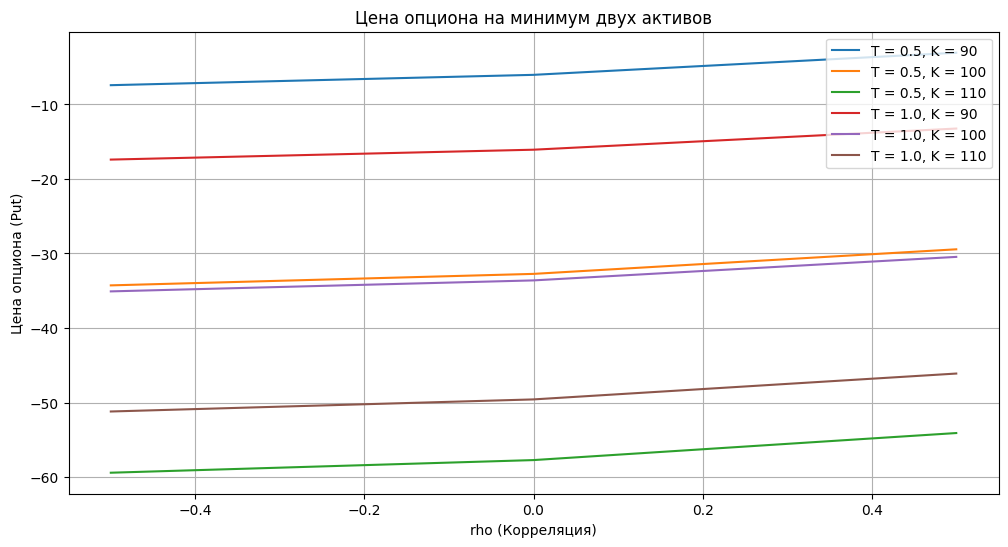

In [67]:
# Цена опциона на минимум двух активов (Put)
def option_on_min(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, r):
    # Расчет d1, d2, d3
    d1 = (np.log(S1 / K) + (b1 - r + 0.5 * sigma1**2) * T) / (sigma1 * np.sqrt(T))
    d2 = (np.log(S2 / K) + (b2 - r + 0.5 * sigma2**2) * T) / (sigma2 * np.sqrt(T))
    d3 = (np.log(S1 / S2) + (b1 - b2 + 0.5 * (sigma1**2 - sigma2**2)) * T) / \
            (np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2) * np.sqrt(T))

    # Расчет цены
    price = (K * np.exp(-r * T) * norm.cdf(-d3) -
                S1 * np.exp((b1 - r) * T) * norm.cdf(-d1) -
                S2 * np.exp((b2 - r) * T) * norm.cdf(-d2))
    return price

# Параметры задачи
S1, S2 = 100, 105
b1, b2 = 0.02, 0.05
sigma1, sigma2 = 0.3, 0.4
K_range = [90, 100, 110]
rho_range = [-0.5, 0, 0.5]
T_range = [0.5, 1.0]
r = 0.07

# Вычисление цен
min_option_results = []
for K in K_range:
    for rho in rho_range:
        for T in T_range:
            price = option_on_min(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, r)
            min_option_results.append({"K": K, "rho": rho, "T": T, "Price": price})

# Преобразование в DataFrame
min_option_df = pd.DataFrame(min_option_results)

# Построение таблицы
print("Результаты для опциона на минимум двух активов (Put):")
print(min_option_df)

# Визуализация
plt.figure(figsize=(12, 6))
for T in T_range:
    subset = min_option_df[min_option_df["T"] == T]
    for K in K_range:
        subset_K = subset[subset["K"] == K]
        plt.plot(subset_K["rho"], subset_K["Price"], label=f"T = {T}, K = {K}")
plt.xlabel("rho (Корреляция)")
plt.ylabel("Цена опциона (Put)")
plt.title("Цена опциона на минимум двух активов")
plt.legend()
plt.grid()
plt.show()

# Task 7

Результаты для опциона на спред:
   rho    T      Price
0 -0.5  0.5  13.641655
1 -0.5  1.0  18.607887
2  0.0  0.5  10.767232
3  0.0  1.0  14.812255
4  0.5  0.5   7.071328
5  0.5  1.0   9.884029


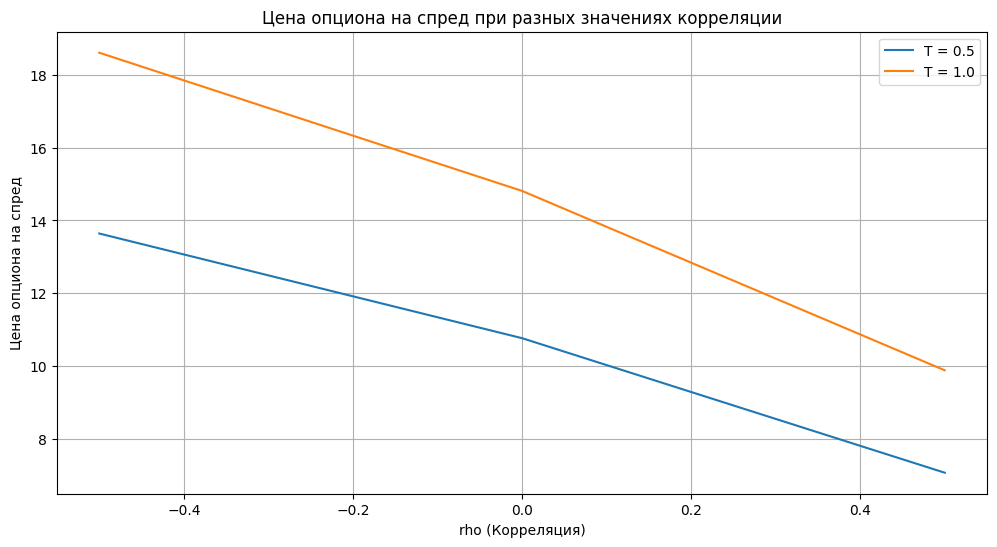

In [68]:
# Функция для расчёта цены опциона на спред
def spread_option_price(S1, S2, b1, b2, sigma1, sigma2, rho, T, r):
    # Форвардные цены активов
    F1 = S1 * np.exp((b1 - r) * T)
    F2 = S2 * np.exp((b2 - r) * T)
    
    # Эффективная волатильность
    sigma_eff = np.sqrt(sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
    
    # Расчёт d1 и d2
    d1 = (np.log(F1 / F2) + 0.5 * sigma_eff**2 * T) / (sigma_eff * np.sqrt(T))
    d2 = d1 - sigma_eff * np.sqrt(T)
    
    # Цена опциона на спред
    price = np.exp(-r * T) * (F1 * norm.cdf(d1) - F2 * norm.cdf(d2))
    return price

# Параметры задачи
S1, S2 = 100, 105
b1, b2 = 0.02, 0.05
sigma1, sigma2 = 0.3, 0.4
rho_range = [-0.5, 0, 0.5]
T_range = [0.5, 1.0]
r = 0.07

# Вычисление цен
spread_option_results = []
for rho in rho_range:
    for T in T_range:
        price = spread_option_price(S1, S2, b1, b2, sigma1, sigma2, rho, T, r)
        spread_option_results.append({"rho": rho, "T": T, "Price": price})

# Преобразование в DataFrame
spread_option_df = pd.DataFrame(spread_option_results)

# Построение таблицы
print("Результаты для опциона на спред:")
print(spread_option_df)

# Визуализация
plt.figure(figsize=(12, 6))
for T in T_range:
    subset = spread_option_df[spread_option_df["T"] == T]
    plt.plot(subset["rho"], subset["Price"], label=f"T = {T}")
plt.xlabel("rho (Корреляция)")
plt.ylabel("Цена опциона на спред")
plt.title("Цена опциона на спред при разных значениях корреляции")
plt.legend()
plt.grid()
plt.show()

# Task 8

Результаты для двух-активного барьерного опциона 'out':
   rho    T      Price
0 -0.5  0.5  -8.442847
1 -0.5  1.0  -5.465184
2  0.0  0.5 -11.307607
3  0.0  1.0  -9.289951
4  0.5  0.5 -14.924494
5  0.5  1.0 -14.203089


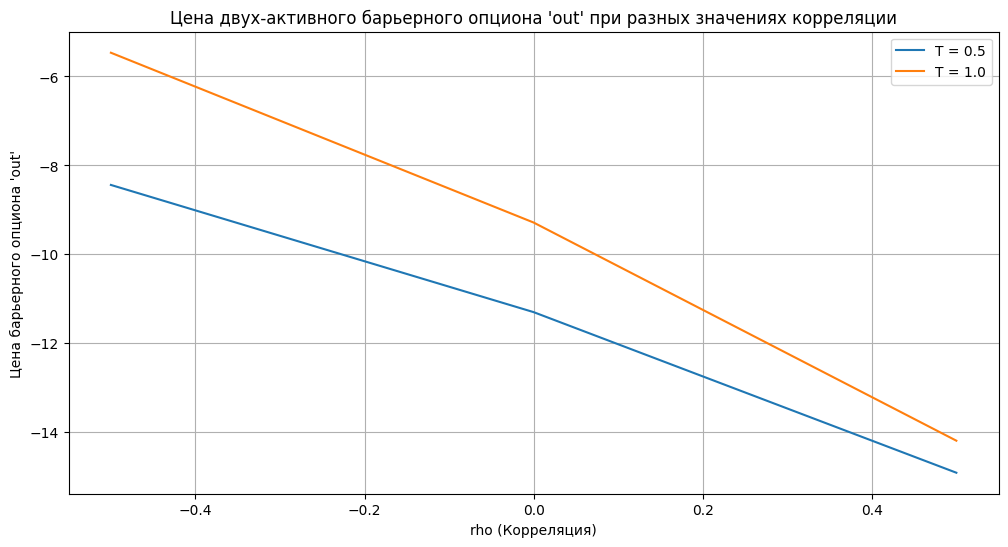

In [69]:
# Функция для расчёта цены двух-активного барьерного опциона "out"
def two_asset_out_barrier_option(S1, S2, b1, b2, sigma1, sigma2, H1, H2, K, rho, T, r, is_call=True):
    # Стандартный двух-активный опцион (vanilla)
    vanilla_price = spread_option_price(S1, S2, b1, b2, sigma1, sigma2, rho, T, r)
    
    # Элементы для вероятности пересечения барьера
    theta = 1 if is_call else -1
    
    d1_H1 = (np.log(S1 / H1) + (b1 - 0.5 * sigma1**2) * T) / (sigma1 * np.sqrt(T))
    d2_H2 = (np.log(S2 / H2) + (b2 - 0.5 * sigma2**2) * T) / (sigma2 * np.sqrt(T))
    
    # Knock-out вероятность
    knockout_probability = norm.cdf(-theta * d1_H1) * norm.cdf(-theta * d2_H2)
    
    # Цена "knockout"
    knockout_price = np.exp(-r * T) * (K * knockout_probability)
    
    # Цена барьерного опциона "out"
    out_price = vanilla_price - knockout_price
    
    return out_price

# Параметры задачи
S1, S2 = 100, 110
b1, b2 = 0.02, 0.05
sigma1, sigma2 = 0.3, 0.4
H1, H2 = 90, 120  # Барьеры
K = 100  # Цена страйка
rho_range = [-0.5, 0, 0.5]
T_range = [0.5, 1.0]
r = 0.07

# Вычисление цен
barrier_option_results = []
for rho in rho_range:
    for T in T_range:
        price = two_asset_out_barrier_option(S1, S2, b1, b2, sigma1, sigma2, H1, H2, K, rho, T, r, is_call=True)
        barrier_option_results.append({"rho": rho, "T": T, "Price": price})

# Преобразование в DataFrame
barrier_option_df = pd.DataFrame(barrier_option_results)

# Построение таблицы
print("Результаты для двух-активного барьерного опциона 'out':")
print(barrier_option_df)

# Визуализация
plt.figure(figsize=(12, 6))
for T in T_range:
    subset = barrier_option_df[barrier_option_df["T"] == T]
    plt.plot(subset["rho"], subset["Price"], label=f"T = {T}")
plt.xlabel("rho (Корреляция)")
plt.ylabel("Цена барьерного опциона 'out'")
plt.title("Цена двух-активного барьерного опциона 'out' при разных значениях корреляции")
plt.legend()
plt.grid()
plt.show()

# Task 9

Результаты для двух-активного барьерного опциона 'in':
   rho    T      Price
0 -0.5  0.5  20.468401
1 -0.5  1.0  22.617948
2  0.0  0.5  20.468401
3  0.0  1.0  22.617948
4  0.5  0.5  20.468401
5  0.5  1.0  22.617948


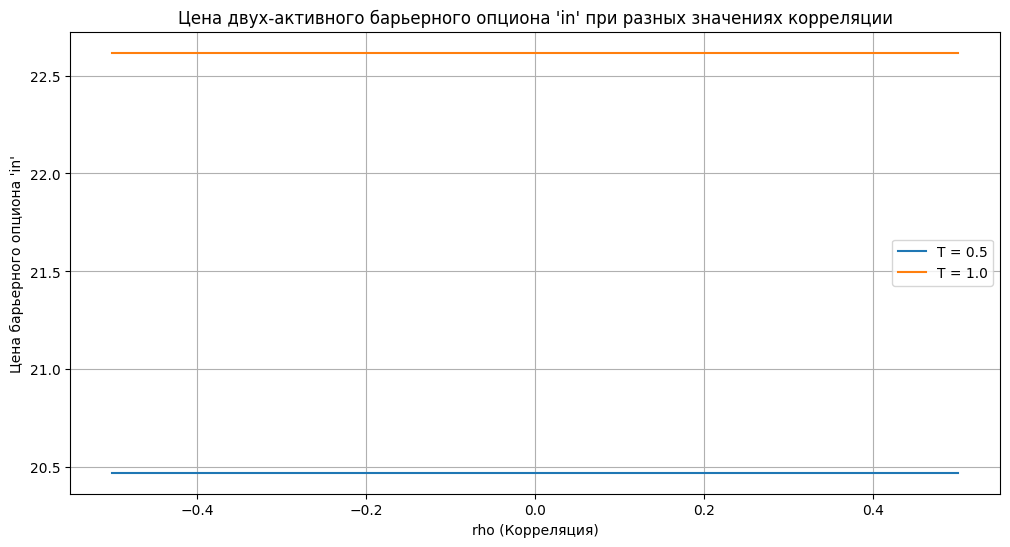

In [70]:
# Функция для расчёта цены двух-активного барьерного опциона "in"
def two_asset_in_barrier_option(S1, S2, b1, b2, sigma1, sigma2, H1, H2, K, rho, T, r, is_call=True):
    # Стандартный двух-активный опцион (vanilla)
    vanilla_price = spread_option_price(S1, S2, b1, b2, sigma1, sigma2, rho, T, r)
    
    # Цена барьерного опциона "out"
    out_price = two_asset_out_barrier_option(S1, S2, b1, b2, sigma1, sigma2, H1, H2, K, rho, T, r, is_call)
    
    # Цена барьерного опциона "in"
    in_price = vanilla_price - out_price
    
    return in_price

# Параметры задачи
S1, S2 = 100, 110
b1, b2 = 0.02, 0.05
sigma1, sigma2 = 0.3, 0.4
H1, H2 = 90, 120  # Барьеры
K = 100  # Цена страйка
rho_range = [-0.5, 0, 0.5]
T_range = [0.5, 1.0]
r = 0.07

# Вычисление цен
barrier_in_option_results = []
for rho in rho_range:
    for T in T_range:
        price = two_asset_in_barrier_option(S1, S2, b1, b2, sigma1, sigma2, H1, H2, K, rho, T, r, is_call=True)
        barrier_in_option_results.append({"rho": rho, "T": T, "Price": price})

# Преобразование в DataFrame
barrier_in_option_df = pd.DataFrame(barrier_in_option_results)

# Построение таблицы
print("Результаты для двух-активного барьерного опциона 'in':")
print(barrier_in_option_df)

# Визуализация
plt.figure(figsize=(12, 6))
for T in T_range:
    subset = barrier_in_option_df[barrier_in_option_df["T"] == T]
    plt.plot(subset["rho"], subset["Price"], label=f"T = {T}")
plt.xlabel("rho (Корреляция)")
plt.ylabel("Цена барьерного опциона 'in'")
plt.title("Цена двух-активного барьерного опциона 'in' при разных значениях корреляции")
plt.legend()
plt.grid()
plt.show()

# 10-11-12 tasks

Результаты для частичного времени барьерных опционов:
   rho    T  Down-in Price  Up-in Price  Cash-or-nothing Price
0 -0.5  0.5      55.040757    55.040757               5.055219
1 -0.5  1.0     229.945753   229.945753              12.536361
2  0.0  0.5     266.159407   266.159407              10.699544
3  0.0  1.0     755.747900   755.747900              17.465203
4  0.5  0.5     529.451116   529.451116              13.977558
5  0.5  1.0    1314.011732  1314.011732              19.443706


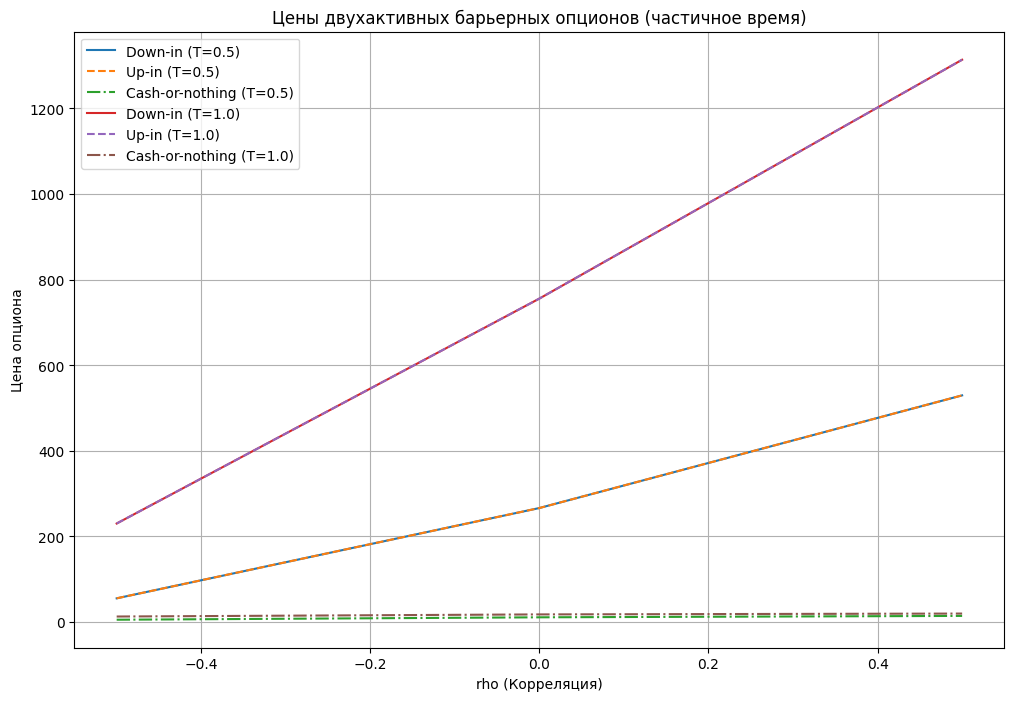

In [71]:
def two_asset_barrier_option(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, r, B, barrier_type="down-in", is_call=True):
    theta = 1 if is_call else -1
    sigma = np.sqrt(sigma1**2 + sigma2**2 + 2 * rho * sigma1 * sigma2)
    d1 = (np.log(S1 * S2 / K) + (b1 + b2 + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    F = S1 * S2 * np.exp((b1 + b2 + rho * sigma1 * sigma2) * T)
    
    if barrier_type == "down-in":
        return np.exp(-r * T) * (F * norm.cdf(theta * d1) - K * norm.cdf(theta * d2))
    elif barrier_type == "up-in":
        return np.exp(-r * T) * (F * norm.cdf(theta * d1) - K * norm.cdf(theta * d2))
    elif barrier_type == "cash-or-nothing":
        Q = 100  # Фиксированная выплата
        return np.exp(-r * T) * Q * norm.cdf(theta * d2)
    else:
        raise ValueError("Unknown barrier type")

# Параметры
S1, S2 = 100, 105
b1, b2 = 0.02, 0.05
sigma1, sigma2 = 0.3, 0.3
K = 15000
rho_range = [-0.5, 0, 0.5]
T_range = [0.5, 1.0]
r = 0.07
B = 120  # Уровень барьера

# Вычисление цен
results = []
for rho in rho_range:
    for T in T_range:
        price_down_in = two_asset_barrier_option(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, r, B, barrier_type="down-in", is_call=True)
        price_up_in = two_asset_barrier_option(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, r, B, barrier_type="up-in", is_call=True)
        price_cash_or_nothing = two_asset_barrier_option(S1, S2, b1, b2, sigma1, sigma2, K, rho, T, r, B, barrier_type="cash-or-nothing", is_call=True)
        results.append({"rho": rho, "T": T, "Down-in Price": price_down_in, "Up-in Price": price_up_in, "Cash-or-nothing Price": price_cash_or_nothing})

# Преобразование в DataFrame
df = pd.DataFrame(results)

# Построение таблицы
print("Результаты для частичного времени барьерных опционов:")
print(df)

# Визуализация
plt.figure(figsize=(12, 8))
for T in T_range:
    subset = df[df["T"] == T]
    plt.plot(subset["rho"], subset["Down-in Price"], label=f"Down-in (T={T})")
    plt.plot(subset["rho"], subset["Up-in Price"], '--', label=f"Up-in (T={T})")
    plt.plot(subset["rho"], subset["Cash-or-nothing Price"], '-.', label=f"Cash-or-nothing (T={T})")

plt.xlabel("rho (Корреляция)")
plt.ylabel("Цена опциона")
plt.title("Цены двухактивных барьерных опционов (частичное время)")
plt.legend()
plt.grid()
plt.show()